In [202]:
#pip installs
%pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 623.7 kB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [88]:
from bs4 import BeautifulSoup
from time import sleep
from requests.adapters import HTTPAdapter
from random import randint
import requests
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

#for plotting images & adjusting colors
from os import path, getcwd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib as mpl
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords as stop
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import matplotlib.colors as mcolors
import os
import random



[nltk_data] Downloading package punkt to /Users/prempatel/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/prempatel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [203]:
import chart_studio
import chart_studio.plotly as py
import chart_studio.tools as tls
username = 'prempatell'
key = '3HLxlJf5IqdX53EPwTeW'

chart_studio.tools.set_credentials_file(username=username, api_key=key)


In [256]:
# Place the DataFrames side by side
planecrashinfo = pd.read_excel('planecrashinfo.xlsx')
summary = pd.DataFrame(planecrashinfo['Summary'])
location = pd.DataFrame(planecrashinfo['Location'])


In [65]:
aboard_death = pd.DataFrame(planecrashinfo[['Date','aboard total','Total_Fatalities']])
aboard_death = aboard_death.groupby([aboard_death.Date.dt.year]).sum()

display(aboard_death)

,aboard total,Total_Fatalities
Date,,
1908,2.0,1.0
1909,1.0,1.0
1912,5.0,5.0
1913,49.0,43.0
1915,60.0,36.0
...,...,...
2019,432.0,305.0
2020,703.0,355.0
2021,247.0,186.0


In [66]:
aboard_death = aboard_death.reset_index()
aboard_death.Date = aboard_death.Date.apply(str)
aboard_death.index = aboard_death['Date']
del aboard_death['Date']
aboard_death = aboard_death['1920':'2020']
survialrate = (1-(aboard_death['Total_Fatalities'] / aboard_death['aboard total'])) * 100
aboard_death['Survival Ratio'] = survialrate.round() #calculating ratio
aboard_death = aboard_death.reset_index()
display(aboard_death)

,Date,aboard total,Total_Fatalities,Survival Ratio
0,1920,32.0,25.0,22.0
1,1921,70.0,64.0,9.0
2,1922,102.0,89.0,13.0
3,1923,91.0,78.0,14.0
4,1924,20.0,20.0,0.0
...,...,...,...,...
96,2016,903.0,515.0,43.0
97,2017,245.0,214.0,13.0
98,2018,1239.0,874.0,29.0
99,2019,432.0,305.0,29.0


In [227]:
survival_pre = aboard_death['Survival Ratio'][0:54].mean()
print(survival_pre)
survival_post = aboard_death['Survival Ratio'][54:].mean()
print(survival_post)

21.5
33.8235294117647


In [204]:
sfig = px.scatter(aboard_death, x="Date", y="Survival Ratio", title="Survival Rate (1970-2020)",
             labels={'Date': 'Date', 'Survival Ratio': 'Survival Rate %'})
             
                       
sfig.update_traces(mode='lines+markers', line=dict(width=3, color='#5FB9B3'), marker=dict( color='black'))

sfig.update_layout(
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 15,
    height=500,
    xaxis=dict(
        tickangle=-90
    )
    )
 

sfig.show()

In [205]:
py.plot(sfig, filename = 'Survival Rate of Plane Crash', auto_open = True)

'https://plotly.com/~prempatell/2/'

In [5]:
display(summary)
display(location)


,Summary
0,"During a demonstration flight, a U.S. Army fly..."
1,Eugene Lefebvre was the first pilot to ever be...
2,First U.S. dirigible Akron exploded just offsh...
3,The first fatal airplane accident in Canada oc...
4,The airship flew into a thunderstorm and encou...
...,...
5022,The cargo plane carrying eight crew members an...
5023,"While on final approach to Bukoba Airport, the..."
5024,The Airbus A320 collided with a fire truck whi...
5025,The plane was chartered to carry a team of six...


,Location
0,"Fort Myer, Virginia"
1,"Juvisy-sur-Orge, France"
2,"Atlantic City, New Jersey"
3,"Victoria, British Columbia, Canada"
4,Over the North Sea
...,...
5022,"Eleftheroupolis, Greece"
5023,"Bukoba, Tanzania"
5024,"Lima, Peru"
5025,"Medellín, Colombia"


In [6]:
fatalities = pd.DataFrame(planecrashinfo[['Date','Total_Fatalities']])
fatalities = fatalities.groupby([fatalities.Date.dt.year]).sum()
display(fatalities)

,Total_Fatalities
Date,
1908,1.0
1909,1.0
1912,5.0
1913,43.0
1915,36.0
...,...
2019,305.0
2020,355.0
2021,186.0


In [7]:
totals = pd.read_excel('airpass.xls')
totals = totals.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'], axis = 1)
totals = totals.replace(np.nan, 0)
totals = pd.DataFrame(totals.sum())
totals = totals['1970':'2020']
totals.columns = ['Passenger Total']
totals.index.name = 'Date'
display(totals)

,Passenger Total
Date,
1970,5.717280e+07
1971,5.747050e+07
1972,4.824680e+07
1973,5.909760e+07
1974,6.482020e+07
1975,6.548990e+07
1976,6.806190e+07
1977,6.997510e+07
1978,7.186290e+07


In [8]:
fatalities = fatalities.reset_index()
fatalities.Date = fatalities.Date.apply(str)
fatalities.index = fatalities['Date']
del fatalities['Date']
fatalities = fatalities['1970':'2020']
display(fatalities)
fatalities = fatalities[['Total_Fatalities']]
totals = pd.concat([totals, fatalities], axis=1) #joining two data frames into one
totals['Ratio'] = totals['Total_Fatalities'] / totals['Passenger Total'] * 100 #calculating ratio

,Total_Fatalities
Date,
1970,1920.0
1971,1784.0
1972,2796.0
1973,2323.0
1974,2242.0
1975,1460.0
1976,1842.0
1977,2102.0
1978,1444.0


In [9]:
totals = totals.reset_index()
display(totals)

,Date,Passenger Total,Total_Fatalities,Ratio
0,1970,5.717280e+07,1920.0,0.003358
1,1971,5.747050e+07,1784.0,0.003104
2,1972,4.824680e+07,2796.0,0.005795
3,1973,5.909760e+07,2323.0,0.003931
4,1974,6.482020e+07,2242.0,0.003459
5,1975,6.548990e+07,1460.0,0.002229
6,1976,6.806190e+07,1842.0,0.002706
7,1977,6.997510e+07,2102.0,0.003004
8,1978,7.186290e+07,1444.0,0.002009
9,1979,7.553370e+07,1838.0,0.002433


In [237]:
pfig = px.scatter(totals, x="Date", y="Passenger Total", title="Airplane Passengers (1970-2020)",
             labels={'Date': 'Date', 'Passenger Total': 'Passengers'},
             
             )

pfig.update_traces(
    mode='lines+markers', line=dict(width=3, color='#5FB9B3'), marker=dict(color='black'),
    texttemplate='%{text}<br>Passenger Total: %{customdata[0]:.2e}<br>Date: %{y:.6f}',
    )

pfig.update_layout(
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 15,
    height=500,
    shapes=[],
     xaxis=dict(
        tickangle=-90
    )
    )
    
pfig.add_vrect(
            x0=14, x1=29, 
            annotation_text="---Passangers Increasing---", annotation_position="top right",
            annotation=dict(font_size=17, font_family="Din Condensed"),
            fillcolor="#eba283", opacity=0.25, line_width=0
            )
pfig.add_vrect(
            x0=49, x1=51, 
            fillcolor="#eba283", opacity=0.25, line_width=0
            )
pfig.add_annotation(
        x=49,
        y=328000000,
        xref="x",
        yref="y",
        text="COVID-19",
        showarrow=True,
        font_color = 'black',
        align="center",
        arrowhead=2,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor="black",
        ax=20,
        ay=-30,
        bordercolor="black",
        borderwidth=2,
        borderpad=4,
        bgcolor="#F44855",
        opacity=0.8
        )
pfig.show()

#  dict(
#             type= 'line',
#             yref= 'paper', y0= 0, y1= 1,
#             xref= 'x', x0= 5, x1= 5
#             ),
#         dict(
#             type= 'line',
#             yref= 'paper', y0= 0, y1= 1,
#             xref= 'x', x0= 10, x1= 10
#             )

In [238]:
py.plot(pfig, filename = 'Growth of Passangers', auto_open = False)

'https://plotly.com/~prempatell/4/'

In [11]:
fig = px.scatter(totals, x="Date", y="Total_Fatalities", title="Fatalities (1970-2020)",
             labels={'Date': 'Date', 'Total_Fatalities': 'Deaths'})
             
                       
fig.update_traces(mode='lines+markers', line=dict(width=3, color='#5FB9B3'), marker=dict( color='black'))

fig.update_layout(
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 15,
    )
 
fig.add_vrect(x0=14, x1=29, 
              annotation_text="Fatalities Increasing ", annotation_position="top right",
              annotation=dict(font_size=15, font_family="Din Condensed"),
              fillcolor="#eba283", opacity=0.25, line_width=0)
fig.show()


In [254]:
rfig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
rfig.add_trace(
    go.Scatter(x=totals['Date'], y=totals['Total_Fatalities'], name="Fatalities", line=dict(width=3, color='#F44855')),
    secondary_y=False
)

rfig.add_trace(
    go.Scatter(x=totals['Date'], y=totals['Ratio'], name="Ratio", line=dict(width=3, color='#5FB9B3')),
    secondary_y=True,
)

# Set y-axes titles
rfig.update_yaxes(title_text="<b>Fatalities</b>", secondary_y=False)
rfig.update_yaxes(title_text="<b>Ratio</b>", secondary_y=True)

rfig.update_traces(mode='lines+markers', marker=dict( color='black'))

rfig.update_layout(
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title = 'Fatalities/Total Passengers ',
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 17,
    height=600,
    xaxis=dict(
        tickangle=-90
    )
    )
 
rfig.add_vrect(x0=14, x1=29, 
              annotation_text="⭑-Overall Ratio Decreasing-⭑", annotation_position="top right",
              annotation=dict(font_size=16, font_family="Din Condensed"),
              fillcolor="#eba283", opacity=0.25, line_width=0)
rfig.show()


In [252]:
py.plot(rfig, filename = 'Ratio of Fatalities and Passengers ', auto_open = True)

'https://plotly.com/~prempatell/18/'

In [77]:
def red_color_func(word, font_size, position, orientation, random_state=None,
                    **kwargs):
    return "hsl(10, 100%%, %d%%)" % random.randint(40, 80)

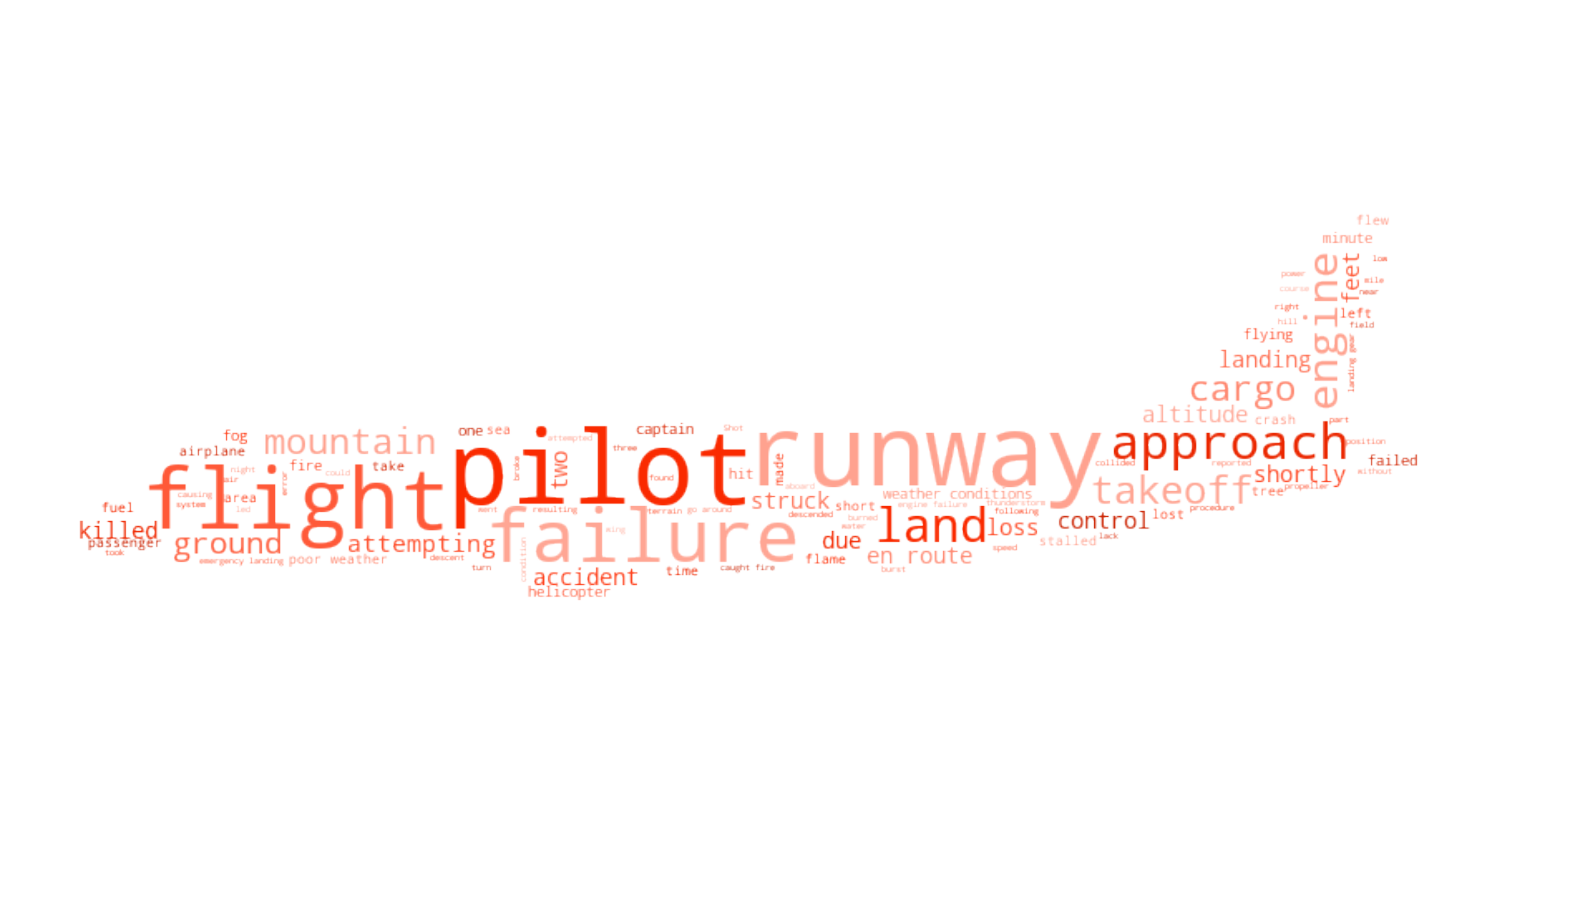

In [172]:
# Replace NaN values with an empty string
summary["Summary"].fillna("", inplace=True)

# Concatenate all the text in the 'Summary' column into a single string
text_summary = " ".join(summary["Summary"].tolist())

# Additional words to exclude from the word cloud
summary_stopwords = ['aircraft', 'plane', 'caused', 'resulted', 'make', 
'making',',','.','The',"'s",'Crashed','crew','ft','Mt','taking','airport']

# Combine the standard stopwords with the additional stopwords
stopwords_all = set(stop.words("english")).union(summary_stopwords)

# Mask Image
d = getcwd()
mask = np.array(Image.open(path.join(d, "plane.jpeg")))
image_colors = ImageColorGenerator(mask)

# Create a word cloud object
wordcloud = WordCloud(
                    max_words=100,
                    mask = mask,
                    stopwords = stopwords_all,
                    collocations=True,
                    background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                    width = 700,
                    height = 500
                    )
wordcloud.generate(text_summary)
# Plot the word cloud
plt.figure( figsize=(20,20) )
plt.imshow(wordcloud.recolor(color_func=red_color_func), interpolation="bilinear")
plt.axis("off")
plt.show()


In [273]:
# Replace NaN values with an empty string
summary["Summary"].fillna("", inplace=True)

# Concatenate all the text in the 'Summary' column into a single string
text_summary = " ".join(summary["Summary"].astype(str).tolist())

# Additional words to exclude from the word cloud
summary_stopwords = ['aircraft', 'plane', 'caused', 'taking','While', 'resulted', 'make', 
'making',',','.','The',"'s",'Crashed','crew','ft','Mt','attempting']

# Combine the standard stopwords with the additional stopwords
stopwords = set(stop.words("english")).union(summary_stopwords)

# Tokenize the text into words
text_summary = str(text_summary)
words = word_tokenize(text_summary)

# Count the frequency of each word
word_counts = Counter(words)

# Filter out stopwords
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Sort the word counts by frequency
sorted_word_counts = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 most frequent words
top_20 = sorted_word_counts[:20]

# Extract the words and frequencies
words = [word for word, count in top_20]
counts = [count for word, count in top_20]

# Capitalize each letter of the word
words = [word.title() for word in words]

# Sort the data in descending order
sorted_data = sorted(zip(counts, words), reverse=False)
counts, words = zip(*sorted_data)


In [274]:
# Create a bar chart
scloudbarfig = px.bar(x=counts, y=words, color=counts, color_continuous_scale='Viridis',
            orientation='h')

# Customize the bar chart
scloudbarfig.update_layout(
    xaxis_title="Words", 
    yaxis_title="Frequency", 
    title="Most Frequent Words in Summary",
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 19,
    height=600,
    width=1000,
    )

scloudbarfig.update_traces(marker_color='#F44855', marker_line_color='#F44855', marker_line_width=1.5)

# Show the plot
scloudbarfig.show()

In [258]:
py.plot(scloudbarfig, filename = 'Summary Word Bar ', auto_open = True)

'https://plotly.com/~prempatell/20/'

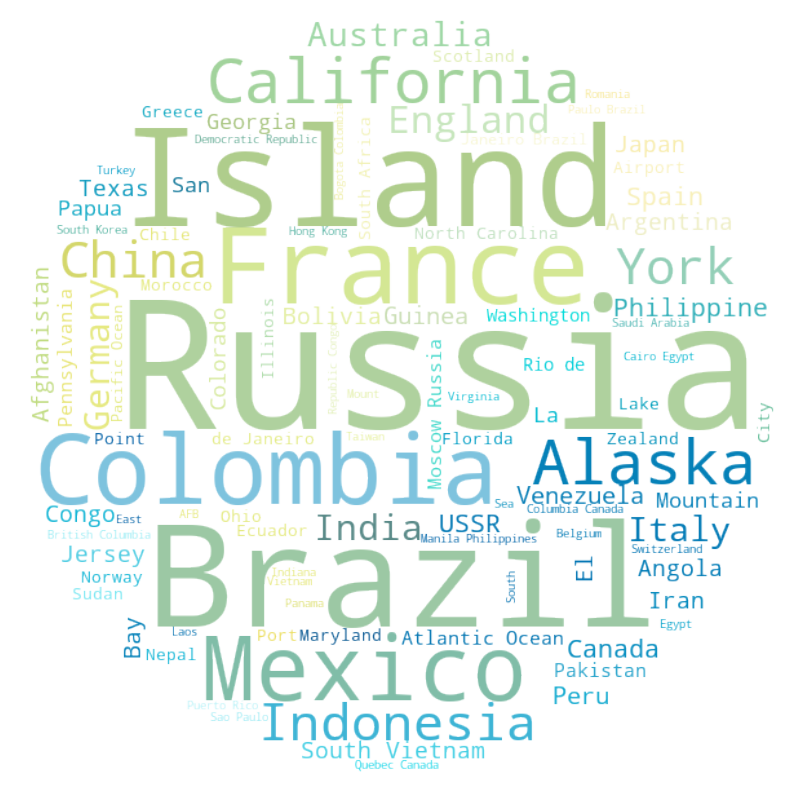

In [259]:
# Replace NaN values with an empty string
location["Location"].fillna("", inplace=True)

# Concatenate all the text in the 'Summary' column into a single string
location_text = " ".join(location["Location"].tolist())

# Additional words to exclude from the word cloud
location_stopwords = ['near', 'Near', 'over', 'the', 'off', 'Off', 'Mt', 'New']

# Combine the standard stopwords with the additional stopwords
stopwords_all = set(stop.words("english")).union(location_stopwords)

# Mask Image
d = getcwd()
mask = np.array(Image.open(path.join(d, "globe2.jpeg")))
image_colors = ImageColorGenerator(mask)


# Create a word cloud object
wordcloud = WordCloud(
                    stopwords = stopwords_all,
                    collocations=True,
                    max_words=100,
                    mask = mask,
                    background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                    width = 700,
                    height = 500
                    )

wordcloud.generate(location_text)
# Plot the word cloud
plt.figure( figsize=(10,10) )
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()


In [260]:
# Replace NaN values with an empty string
location["Location"].fillna("", inplace=True)

# Concatenate all the text in the 'Summary' column into a single string
location_text = " ".join(location["Location"].astype(str).tolist())

# Additional words to exclude from the word cloud
location_stopwords = ['near', 'Near', 'over', 'the', 'off', 'Off', 'Mt', 'New',",",'South','.','San', 'City']

# Combine the standard stopwords with the additional stopwords
stopwords = set(stop.words("english")).union(location_stopwords)

# Tokenize the text into words
location_text = str(location_text)
words = word_tokenize(location_text)

# Count the frequency of each word
word_counts = Counter(words)

# Filter out stopwords
filtered_word_counts = {word: count for word, count in word_counts.items() if word not in stopwords}

# Sort the word counts by frequency
sorted_word_counts = sorted(filtered_word_counts.items(), key=lambda x: x[1], reverse=True)

# Get the top 20 most frequent words
top_20 = sorted_word_counts[:20]

# Extract the words and frequencies
words = [word for word, count in top_20]
counts = [count for word, count in top_20]

# Capitalize each letter of the word
words = [word.title() for word in words]

# Sort the data in descending order
sorted_data = sorted(zip(counts, words), reverse=False)
counts, words = zip(*sorted_data)


In [263]:
# Create a bar chart
lfig = px.bar(x=counts, y=words, color=counts, color_continuous_scale='Viridis',
            orientation='h')

# Customize the bar chart
lfig.update_layout(
    xaxis_title="Words", 
    yaxis_title="Frequency", 
    title="Most Frequent Plane Crash Locations",
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 13,
    height=600,
    width=900,
    )


lfig.update_traces(marker_color='#5FB9B3', marker_line_color='#5FB9B3', marker_line_width=1.5)

# Show the plot
lfig.show()

In [265]:
py.plot(lfig, filename = 'Location Word Bar ', auto_open = True)

'https://plotly.com/~prempatell/23/'

In [347]:
#Operator Analysis 
operator = pd.DataFrame(planecrashinfo[['Date', 'Operator', 'Total_Fatalities', 'aboard total']])
display(operator)

,Date,Operator,Total_Fatalities,aboard total
0,1908-09-17,Military - U.S. Army,1.0,2.0
1,1909-09-07,NaN,1.0,1.0
2,1912-07-12,Military - U.S. Navy,5.0,5.0
3,1913-08-06,Private,1.0,1.0
4,1913-09-09,Military - German Navy,14.0,20.0
...,...,...,...,...
5022,2022-07-16,Meridian,8.0,8.0
5023,2022-11-06,Precision Air,19.0,43.0
5024,2022-11-18,LATAM,0.0,108.0
5025,2022-11-21,AeroPaca SAS,8.0,8.0


In [314]:
filtered_df = operator[operator['Operator'].isnull()]
display(filtered_df)

,Date,Operator,Total_Fatalities,aboard total,isMilitary,isMail,isPrivate
1,1909-09-07,NaN,1.0,1.0,NaN,NaN,NaN
17,1917-06-17,NaN,14.0,16.0,NaN,NaN,NaN
67,1922-04-08,NaN,17.0,17.0,NaN,NaN,NaN
69,1922-07-04,NaN,2.0,3.0,NaN,NaN,NaN
114,1926-09-26,NaN,2.0,5.0,NaN,NaN,NaN
376,1935-05-29,NaN,6.0,9.0,NaN,NaN,NaN
684,1943-07-04,NaN,12.0,13.0,NaN,NaN,NaN
859,1946-04-08,NaN,14.0,14.0,NaN,NaN,NaN
2064,1963-09-02,NaN,15.0,16.0,NaN,NaN,NaN
4840,2011-12-26,NaN,3.0,3.0,NaN,NaN,NaN


In [348]:
operator['isMilitary'] = operator.Operator.str.contains('military', case=False)
operator['isMail'] = operator.Operator.str.contains('mail', case=False)
operator['isPrivate'] = operator.Operator.str.contains('private', case=False)
operator_distribution = operator.groupby('isMilitary')[['isMilitary']].count()
display(operator)


,Date,Operator,Total_Fatalities,aboard total,isMilitary,isMail,isPrivate
0,1908-09-17,Military - U.S. Army,1.0,2.0,True,False,False
1,1909-09-07,NaN,1.0,1.0,NaN,NaN,NaN
2,1912-07-12,Military - U.S. Navy,5.0,5.0,True,False,False
3,1913-08-06,Private,1.0,1.0,False,False,True
4,1913-09-09,Military - German Navy,14.0,20.0,True,False,False
...,...,...,...,...,...,...,...
5022,2022-07-16,Meridian,8.0,8.0,False,False,False
5023,2022-11-06,Precision Air,19.0,43.0,False,False,False
5024,2022-11-18,LATAM,0.0,108.0,False,False,False
5025,2022-11-21,AeroPaca SAS,8.0,8.0,False,False,False


In [342]:
display(operator_distribution)

,isMilitary
isMilitary,
False,4251
True,766


In [349]:
operator = operator.loc[(operator['isMilitary'] == False)&(operator['isMail'] == False)&(operator['isPrivate'] == False)]
display(operator)

,Date,Operator,Total_Fatalities,aboard total,isMilitary,isMail,isPrivate
26,1919-07-21,Wingfoot Air Express Goodyear Tire,3.0,NaN,False,False,False
27,1919-08-02,Caproni Company,14.0,14.0,False,False,False
28,1919-10-02,Aircraft Transport and Travel,1.0,1.0,False,False,False
30,1919-10-20,Aircraft Transport and Travel,0.0,0.0,False,False,False
32,1919-12-11,Aircraft Travel Transport,1.0,1.0,False,False,False
...,...,...,...,...,...,...,...
5022,2022-07-16,Meridian,8.0,8.0,False,False,False
5023,2022-11-06,Precision Air,19.0,43.0,False,False,False
5024,2022-11-18,LATAM,0.0,108.0,False,False,False
5025,2022-11-21,AeroPaca SAS,8.0,8.0,False,False,False


In [366]:
#Which is the safest airline to travel in today

operator = operator[['Date','Operator']]

# Filter the data to only include crashes between the years 2000-2020
mask = (operator['Date'].dt.year >= 2000) & (operator['Date'].dt.year <= 2020) 
filtered_data = operator.loc[mask]
display(filtered_data)
# Group the data by operator and get the count of crashes for each operator
operator_crash_counts = filtered_data.groupby('Operator').size().reset_index(name='Crash Count')
display(operator_crash_counts)
# Sort the data in descending order of crash count
operator_crash_counts = operator_crash_counts.sort_values('Crash Count', ascending=False)

# Print the resulting data

display(operator_crash_counts)

,Date,Operator
4258,2000-01-05,Skypower Express Airways
4259,2000-01-10,Crossair
4260,2000-01-13,Avisto
4261,2000-01-15,TACA
4262,2000-01-30,Kenya Airways
...,...,...
5005,2020-02-05,Pegasus Airlines
5006,2020-03-29,Lion Air Inc.
5007,2020-05-22,Pakistan International Airline
5008,2020-08-07,Air India Exppress


,Operator,Crash Count
0,ADC Airlines,1
1,AE Aviation,1
2,AIRES Colombia,1
3,AZAL Cargo Company,1
4,Ababeel Aviaition,1
...,...,...
555,Wuhan Airlines,1
556,XL Airways leased from Air New Zealand,1
557,YAK Service,1
558,Yemenia Airway,1


,Operator,Crash Count
502,Trigana Air Service,4
91,American Airlines,4
559,Yeti Airlines,3
34,Air Algerie,3
44,Air France,3
...,...,...
188,Deraps Aviation,1
187,Dana Air,1
186,Dagestan Airlines,1
185,Daallo Airlines,1


In [378]:
topworst = operator_crash_counts[:5].sort_values(by='Crash Count', ascending=True)

In [386]:
crashes = topworst['Crash Count']
company = topworst['Operator']
dfig = go.Figure(go.Bar(x=crashes, y=company, orientation='h', marker_color=crashes,
                        marker=dict(colorscale='Spectral', color=crashes)))


dfig.update_layout(
    title='Top 5 Airlines to Avoid Based on Number of Crashes (2000-2020)',
    xaxis_title='Number of Crashes',
    yaxis_title='Airlines', 
    xaxis_showgrid=False, 
    yaxis_showgrid=False,
    title_x=0.5,  
    plot_bgcolor='#FFF9F1', 
    paper_bgcolor='#FFF9F1',
    font_family = 'Din Condensed',
    font_size = 19,
    height=600,
    width=800,
)

dfig.show()

In [387]:
py.plot(dfig, filename = 'Dangerous Airlines ', auto_open = True)

'https://plotly.com/~prempatell/25/'